In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import pandas as pd
from  scipy.optimize import curve_fit
import astropy.units as u
import astropy.constants as c

# %matplotlib widget
plt.rc("font", size=14,family='serif')

df = pd.read_csv("Binary_data 2.csv", skiprows=2)
df.columns = ['time', "z1", "z2"]

def ztov(z):
    return(z*3e8)

df["vorb1"] = df.z1.map(ztov)
df["vorb2"] = df.z2.map(ztov)

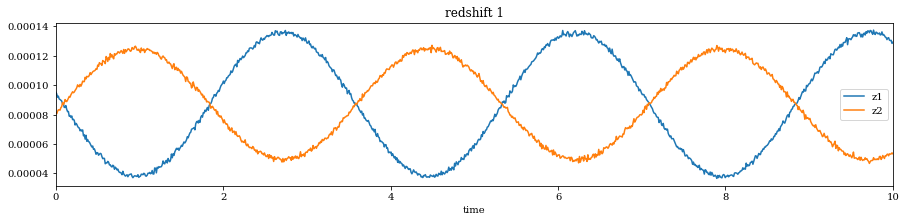

In [11]:
df.plot("time", ["z1", "z2"], title="redshift 1", figsize=(15, 3))

In [22]:
def sinusoid(x, a, b, c, d):
    return( b*np.sin(a*x + d) + c)

# Fit z1
params_list = []
p0=[2, 4.5e-5, 9e-5, 1]
params, cov = curve_fit(sinusoid, df.time, df.z1, p0)
a, b, c, d = params
params_list.append(params)
df['z1-fitted'] = df.time.map(lambda x: sinusoid(x, a, b, c, d))

# Fit z2
params, cov = curve_fit(sinusoid, df.time, df.z2, p0)
a, b, c, d = params
params_list.append(params)
df['z2-fitted'] = df.time.map(lambda x: sinusoid(x, a, b, c, d))

# Fit z1
p0 = [1.65, 1e4,25e3, 1]
params, cov = curve_fit(sinusoid, df.time, df.vorb1, p0)
a, b, c, d = params
df['v1fit'] = df.time.map(lambda x: sinusoid(x, a, b, 0, d))

# Fit z2
params, cov = curve_fit(sinusoid, df.time, df.vorb2, p0)
a, b, c, d = params
df['v2fit'] = df.time.map(lambda x: sinusoid(x, a, b, 0, d))

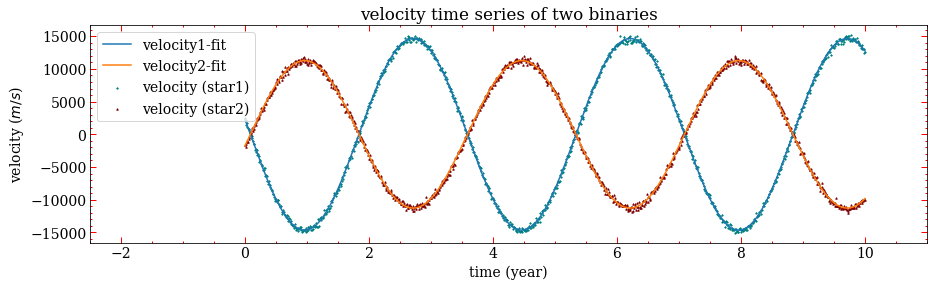

In [23]:
# ax = axes[0]
# ax.scatter(df.time, df.z1, label="z1", marker="*", c='r', s=2, )
# ax.scatter(df.time, df.z2, label="z2", marker="^", c='b', s=2, )
# ax.plot(df.time, df["z1-fitted"], label="z1-fit")
# ax.plot(df.time, df["z2-fitted"], label="z2-fit")
# ax.legend(loc=2)
# ax.set(ylabel="z", title="Redshift time series of two binaries")
# ax.set_xlim(-2.5, 11)
# ax.set_ylim(0.0000125, 0.00015)
# ax.tick_params(which='major', axis='both', direction='in', length=6, width=1, color='r', grid_alpha=0.2, right=True, top=True)
# xticker = MultipleLocator(0.5)
# yticker = MultipleLocator(175e-7)
# ax.xaxis.set_minor_locator(xticker)
# ax.yaxis.set_minor_locator(yticker)
# ax.tick_params(which='minor', axis='both', direction='in', length=2, width=1, color='r', grid_alpha=0.2, right=True, top=True)

fig, axes = plt.subplots( figsize=(15,4), sharex=True)
ax = axes
ax.scatter(df.time, df.vorb1-c, label="velocity (star1)", marker="*", c='teal', s=2, )
ax.scatter(df.time, df.vorb2-c, label="velocity (star2)", marker="^", c='maroon', s=2, )
ax.plot(df.time, df["v1fit"], label="velocity1-fit")
ax.plot(df.time, df["v2fit"], label="velocity2-fit")
ax.legend(loc=2)
ax.set(xlabel="time (year)", ylabel=r"velocity ($m/s$)", title="velocity time series of two binaries")
ax.set_xlim(-2.5, 11)
ax.tick_params(which='major', axis='both', direction='in', length=6, width=1, color='r', grid_alpha=0.2, right=True, top=True)
xticker = MultipleLocator(0.5)
yticker = MultipleLocator(1e3)
ax.xaxis.set_minor_locator(xticker)
ax.yaxis.set_minor_locator(yticker)
ax.tick_params(which='minor', axis='both', direction='in', length=2, width=1, color='r', grid_alpha=0.2, right=True, top=True)
plt.subplots_adjust(wspace=0.4, hspace=0.2)
plt.show()

In [19]:
params = np.array(params_list)
params = np.abs(params)
omega = params[:, 0]   #a
radial = params[:, 2]  #c
orbital = params[:, 1] #b

radial_v = ztov(radial)
orbital_v = ztov(orbital)

r = orbital_v/omega * u.year.to(u.s)
period = 2*np.pi / omega.mean()

mass = orbital_v**2 * r / 6.68e-11

print(f"The period of revolution is: {period:.4f} years")
print(f"mass of lighter star is: {mass.min():2e} Kg")
print(f"mass of heavier star is: {mass.max():2e} Kg")

The period of revolution is: 3.5007 years
mass of lighter star is: 3.776142e+29 Kg
mass of heavier star is: 8.288330e+29 Kg
